In the previous report we looked at fitting the (experimental data) variant-size curves to simple logistic curves. Here we introduce competition to the fitting process through a additional (constant) parameter $z$:
\begin{equation}
dx = \alpha s \, x (1-x-z)
\end{equation}
Note that in the actual model $z$ changes over time since $z(t) = \sum_i x_i(t)$

In [1]:
using CSV, DataFrames, Statistics, StatsBase
include("../../src/dataStructuring.jl")
using .DataStructuring
include("../../src/competitiveSelection.jl")
using .CompetitiveSelection

In [5]:
df = DataFrame(CSV.File("../../Data/ALLvariants_exclSynonymous_Xadj.txt"))
Nf = 2E5
dfVid = DataStructuring.analyseVariants(df, Nf; adjustedLogit=true)

Progress:   6%|███                                      |  ETA: 0:00:28┌ Warning: Initial position cannot be on the boundary of the box. Moving elements to the interior.
│ Element indices affected: [4]
└ @ Optim C:\Users\monper02\.julia\packages\Optim\tP8PJ\src\multivariate\solvers\constrained\fminbox.jl:314
Progress:   8%|████                                     |  ETA: 0:00:43┌ Warning: Initial position cannot be on the boundary of the box. Moving elements to the interior.
│ Element indices affected: [4]
└ @ Optim C:\Users\monper02\.julia\packages\Optim\tP8PJ\src\multivariate\solvers\constrained\fminbox.jl:314
Progress:  40%|█████████████████                        |  ETA: 0:00:34┌ Warning: Initial position cannot be on the boundary of the box. Moving elements to the interior.
│ Element indices affected: [4]
└ @ Optim C:\Users\monper02\.julia\packages\Optim\tP8PJ\src\multivariate\solvers\constrained\fminbox.jl:314
┌ Warning: Initial position cannot be on the boundary of the box. Movi

,_t,vaf_t,pid
,Array…,Array…,Int64
1,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0013, 0.0006, 0.0, 0.0007, 0.0143]",260
2,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0, 0.00155, 0.02915, 0.0562]",260
3,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.3, 0.32235, 0.35725, 0.37775, 0.3896]",260
4,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0008, 0.0061, 0.116, 0.0158]",260
5,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0008, 0.002, 0.0134, 0.2922]",260
6,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0, 0.0, 0.0, 0.02, 0.0166]",260
7,"[61.02, 64.02, 67.75, 71.09, 75.36]","[0.0611, 0.046, 0.0256, 0.0042, 0.0]",260
8,"[61.63, 64.62, 68.43, 71.54, 75.83]","[0.0069, 0.0029, 0.0035, 0.0032, 0.0011]",284
9,"[92.51, 95.63, 100.84]","[0.0196, 0.0324, 0.0748]",737


In [4]:
using CairoMakie
rscale=0.8
myTheme = Theme(
    resolution=(rscale*700,rscale*600),
    fontsize=17,
)
set_theme!(myTheme)

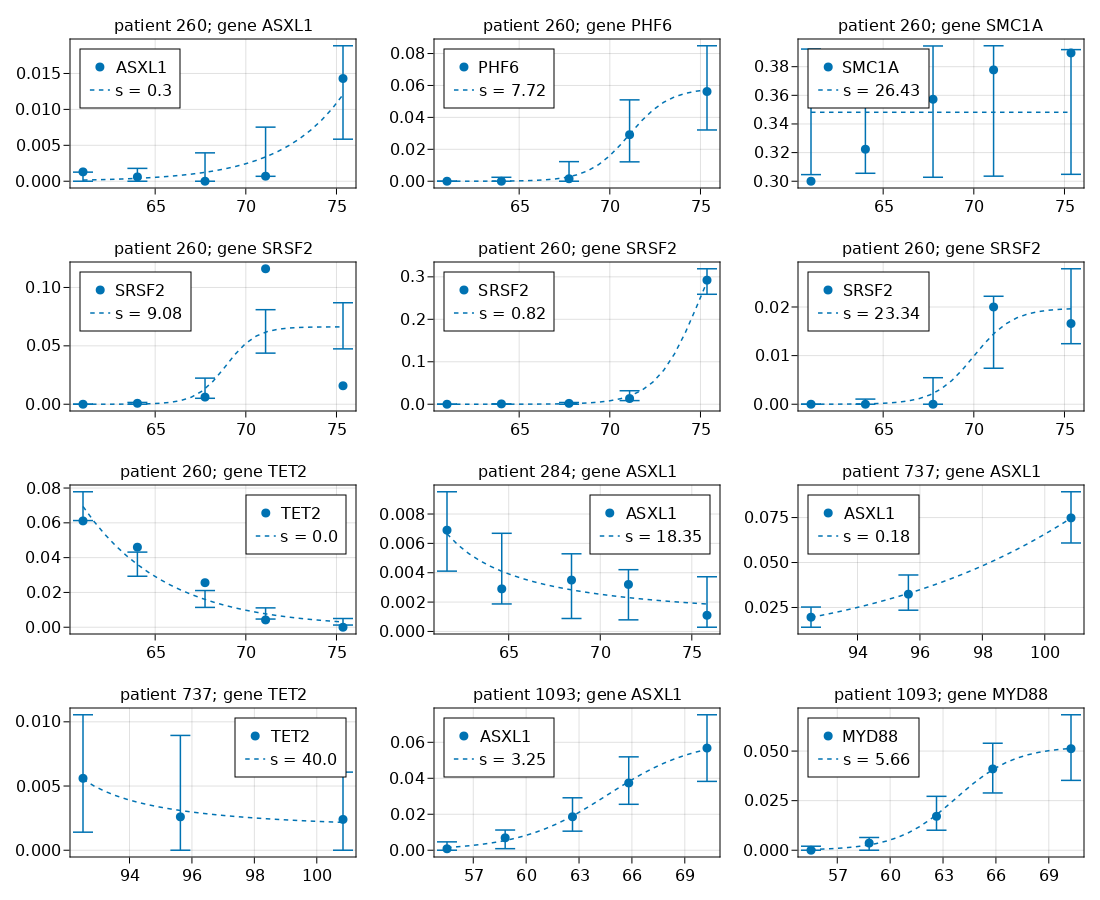

In [6]:
fsize=16
fig1 = Figure(resolution=(1100,900), fontsize=fsize)
nRows = 4
nCols = 3
for (i,dfVCur) in enumerate(eachrow(dfVid[1:12,:]))
    row = i / nCols |> ceil |> Int
    col = (i-1) % nCols + 1
    ax = Axis(
        fig1[row,col],
        title="patient "*string(dfVCur[:pid])*"; gene "*dfVCur[:gene],
    )
    scatter!(dfVCur[:_t], dfVCur[:vaf_t],
        linestyle=:solid,
        label=dfVCur[:gene],
    )
    lines!(dfVCur[:_tt], dfVCur[:vafTh_tt],
        linestyle=:dash,
        label="s = "*string(round(dfVCur[:λ],digits=2)),
    )
    rangebars!(
        dfVCur[:_t], dfVCur[:vafThQl_t], dfVCur[:vafThQu_t],
        whiskerwidth = 20,
        cycle = [:color],
    )
    legendpos = ( dfVCur[:ρ]>0 ? :lt : :rt )
    axislegend(position=legendpos)
end
display(fig1)

While these fits do manage to capture the tendency of variants to slow their expansion before fixation (i.e. stagnation at frequencies lower than 1), we can see the potential for overfitting.

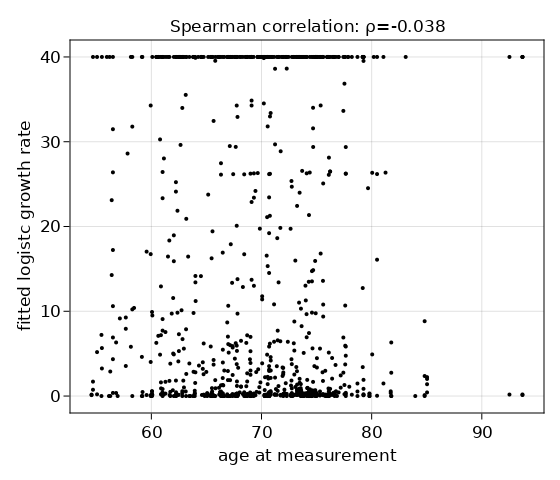

In [11]:
fig2 = Figure(
    resolution=(rscale*700,rscale*600),
    fontsize=17,
)
ρS = corspearman([dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid)], dfVid[!, :λ])
Axis(
    fig2[1,1],
    xlabel="age at measurement",
    ylabel="fitted logistc growth rate",
    title="Spearman correlation: ρ="*string(round(ρS,digits=3))
)
scatter!(
    [dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid)],
    dfVid[!, :λ],
    color=:black,
    markersize=4,
)
display(fig2)

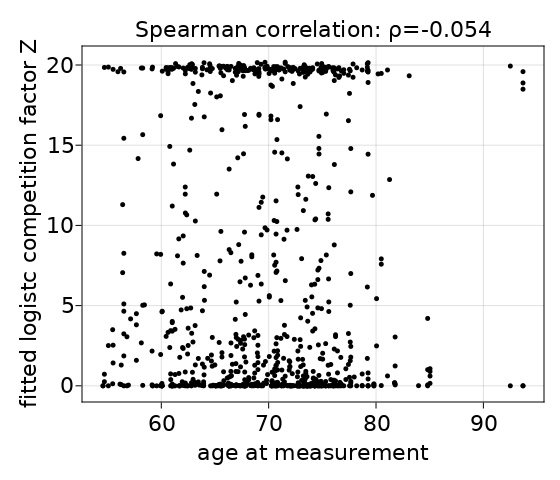

In [12]:
fig3 = Figure(
    resolution=(rscale*700,rscale*600),
    fontsize=22,
)
λThresh=30
_timeMask = [dfVCur[:_t][1]<90 for dfVCur in eachrow(dfVid)]
_λMask = [dfVCur[:λ]<λThresh for dfVCur in eachrow(dfVid)]
# ρS = corspearman([dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid[_timeMask .& _λMask,:])], dfVid[_timeMask .& _λMask, :λ])
ρS = corspearman([dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid[!,:])], dfVid[!, :z])
Axis(
    fig3[1,1],
    xlabel="age at measurement",
    ylabel="fitted logistc competition factor Z",
    title="Spearman correlation: ρ="*string(round(ρS,digits=3))
)
scatter!(
    [dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid[!,:])],
    dfVid[!, :z],
    color=:black,
    markersize=5,
)
# ylims!(-1,1)
display(fig3)



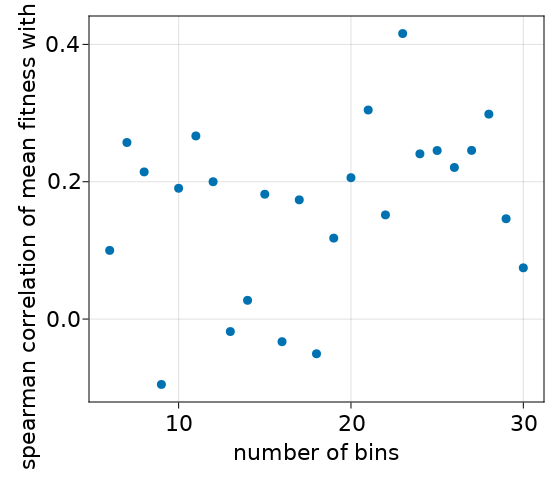

In [13]:
mean(dfVid[!,:z])
nBins = 6:30
corS_nBins = Vector{Float64}(undef, length(nBins))
for (i,bins) in enumerate(nBins)
    _tBin, zAv_tBin = DataStructuring.meanVarFitParamTime([dfVidCur[:_t][1] for dfVidCur in eachrow(dfVid)], dfVid[!, :z]; bins)
    corS_nBins[i] = corspearman(_tBin[.!isnan.(zAv_tBin)], zAv_tBin[.!isnan.(zAv_tBin)])
end
fig3 = Figure(
    resolution=(rscale*700,rscale*600),
    fontsize=22,
)
Axis(
    fig3[1,1],
    xlabel="number of bins",
    ylabel="spearman correlation of mean fitness with time"
)
scatter!(nBins, corS_nBins)
display(fig3)